Generate blank grid: python scripts/master_grid_blank_v3.py → outputs figures/master_grid_blank_v3.png

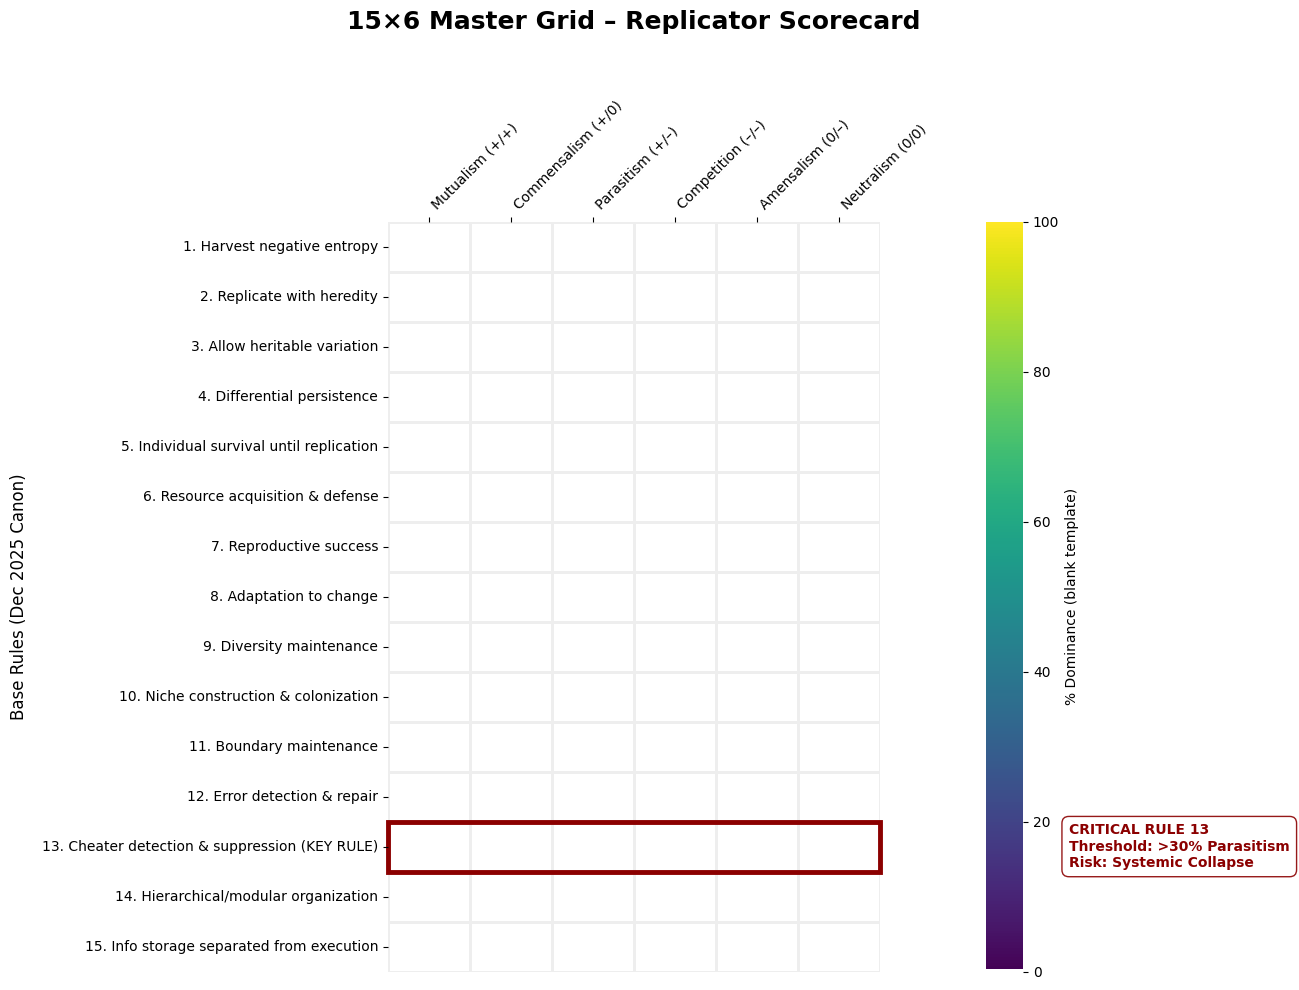

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

# 1. Define Rules and Moves
rules = [
    "1. Harvest negative entropy", "2. Replicate with heredity", "3. Allow heritable variation",
    "4. Differential persistence", "5. Individual survival until replication", "6. Resource acquisition & defense",
    "7. Reproductive success", "8. Adaptation to change", "9. Diversity maintenance",
    "10. Niche construction & colonization", "11. Boundary maintenance", "12. Error detection & repair",
    "13. Cheater detection & suppression (KEY RULE)", "14. Hierarchical/modular organization",
    "15. Info storage separated from execution"
]

moves = [
    "Mutualism (+/+)", "Commensalism (+/0)", "Parasitism (+/–)",
    "Competition (–/–)", "Amensalism (0/–)", "Neutralism (0/0)"
]

# 2. Create blank data
data = pd.DataFrame(np.zeros((len(rules), len(moves))), index=rules, columns=moves)

# 3. Custom Colormap (Matplotlib 3.7+ syntax)
viridis_base = mpl.colormaps["viridis"]
newcolors = viridis_base(np.linspace(0, 1, 256))
newcolors[0, :] = [1, 1, 1, 1]  # Set 0 to Pure White
custom_map = LinearSegmentedColormap.from_list('WhiteViridis', newcolors)

# 4. Plotting Setup
fig, ax = plt.subplots(figsize=(13, 10)) # Slightly wider fig to accommodate right margin
oxford_red = "#8B0000"

# Increased pad to 0.15 to move the gradient bar clear of annotations
sns.heatmap(data, annot=False, cmap=custom_map, vmin=0, vmax=100,
            linewidths=1, linecolor="#eeeeee", cbar=True,
            cbar_kws={'label': '% Dominance (blank template)', 'pad': 0.15}, ax=ax)

# 5. Labels on TOP
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45, ha="left")

# 6. Highlight Rule 13 (Index 12)
rule13_idx = 12
ax.add_patch(plt.Rectangle((0, rule13_idx), len(moves), 1,
                            fill=False, edgecolor=oxford_red, lw=3.5, clip_on=False))

# 7. Aesthetics & Displaced Rule 13 Callout
ax.set_title("15×6 Master Grid – Replicator Scorecard", fontsize=18, pad=50, fontweight='bold')
ax.set_ylabel("Base Rules (Dec 2025 Canon)", fontsize=12, labelpad=10)

# Pushed further right (x=len(moves) + 1.2) to ensure zero contact with the 0-100 scale
ax.text(len(moves) + 2.3, rule13_idx + 0.5,
        "CRITICAL RULE 13\nThreshold: >30% Parasitism\nRisk: Systemic Collapse",
        va='center', ha='left', fontsize=10, color=oxford_red, fontweight='bold',
        bbox=dict(facecolor='white', edgecolor=oxford_red, alpha=0.9, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.savefig("master_grid_blank_v3.png", dpi=300, bbox_inches="tight")
plt.show()